<a href="https://colab.research.google.com/github/Avelez164/Data-Science-Big-Data/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Names:

*   Antonio Velez
*   Farren Tanudjaja


Body fat percentage refers to the relative proportions of body weight in terms of lean body mass (muscle, bone, internal organs, and connective tissue) and body fat.
You probably already know that body fat percentage is an important indicator of overall health - too little or too much body fat is associated with several health issues. This assignment is about estimating body fat percentage from other body measurements.

a. Why is there a need to estimate body fat percentage instead of directly measuring it (e.g., we can directly measure a person’s weight, we don’t have to calculate it)? Do an internet search and answer in 2-3 sentences.

**Estimating body fat percentage is often necessary because direct measurement methods, such as Dual-Energy X-ray Absorptiometry or hydrostatic weighing, are expensive,and require special equipment and expertise. In contrast, estimation methods using body measurements or predictive equations are more accessible, cost-effective, and practical for everyday use, making them suitable for large-scale studies.**

b. The bodyfat.csv file in the Linear Regression module on Canvas contains 13 measurements from subjects (all men) along with their body fat percentage. Read the file using pd.read_csv().

i. Plot BodyFat vs. Height (code, plot)



ii. Which should be the dependent variable?

**BodyFat(%) should be dependent**

iii. Which is the independent variable?

**Height(inches)**

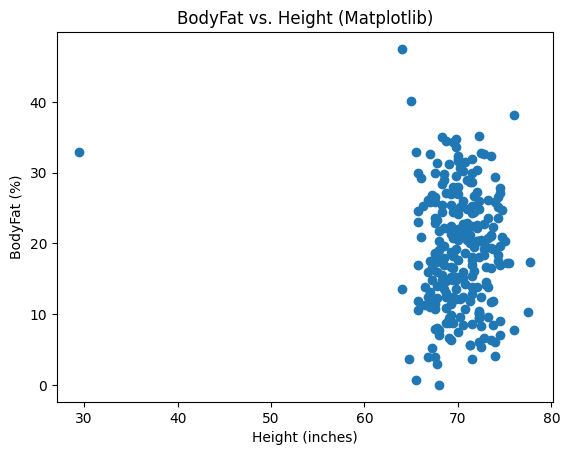

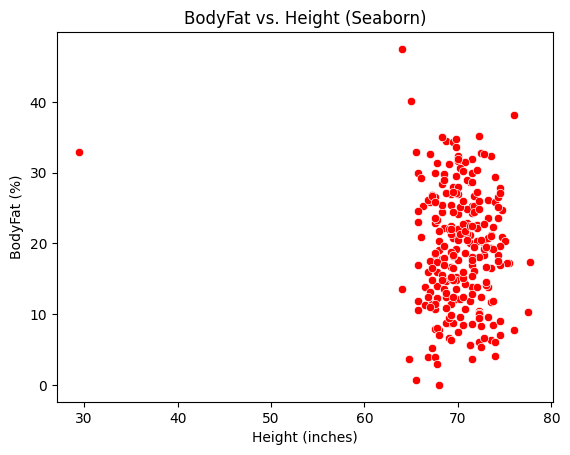

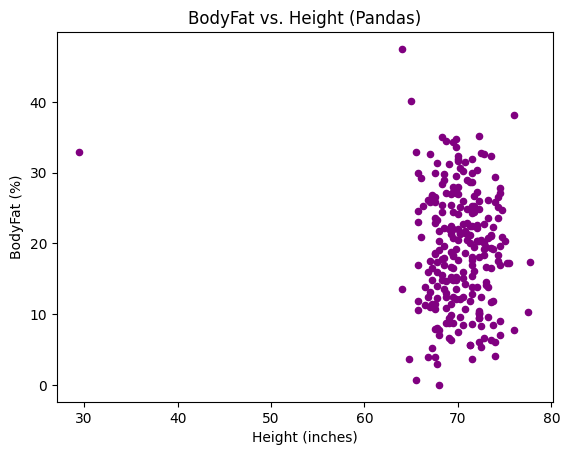

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

url = "https://drive.google.com/uc?export=download&id=1F5GSOb3jVGiVoEeCsEzBwm1Ov019VhkT"
df = pd.read_csv(url)
bodyfat = df

# We can pick which one looks best
# Plot using Matplotlib
plt.scatter(df['Height'], df['BodyFat'])
plt.xlabel('Height (inches)')
plt.ylabel('BodyFat (%)')
plt.title('BodyFat vs. Height (Matplotlib)')
plt.show()

# Plot using Seaborn
sns.scatterplot(x='Height', y='BodyFat', data=df, color='red')
plt.xlabel('Height (inches)')
plt.ylabel('BodyFat (%)')
plt.title('BodyFat vs. Height (Seaborn)')
plt.show()

# Plot using Pandas
df.plot(kind='scatter', x='Height', y='BodyFat', color='purple', title='BodyFat vs. Height (Pandas)')
plt.xlabel('Height (inches)')
plt.ylabel('BodyFat (%)')
plt.show()


c. There is one obvious outlier in the Height column. Remove the corresponding row from the data and plot again. This will be the data used for the following questions. Confirm that the mean Height is now 70.31076.

i. Show code to remove the row, plot, and calculate mean

ii. Show plot


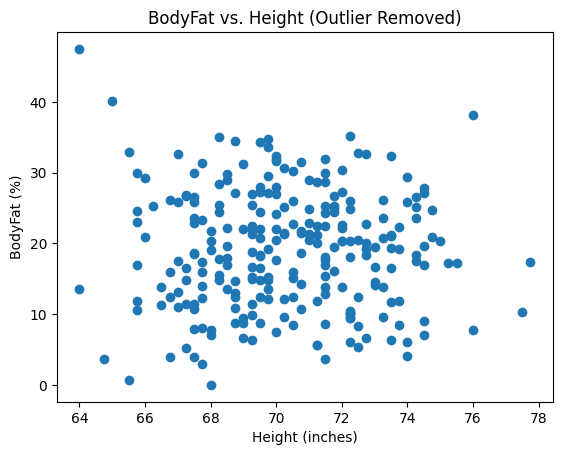

Mean Height after removing outlier: 70.31076


In [ ]:
bodyfat = bodyfat[bodyfat['Height'] > 40]
plt.scatter(bodyfat['Height'], bodyfat['BodyFat'])
plt.xlabel('Height (inches)')
plt.ylabel('BodyFat (%)')
plt.title('BodyFat vs. Height (Outlier Removed)')
plt.show()

mean_height = bodyfat['Height'].mean()
print(f"Mean Height after removing outlier: {mean_height:.5f}")

d. Create a linear model of BodyFat vs. Height.

i. Show sm.formula.ols() code, output of results.summary()

ii. What is the R2 value?

**0.001**

iii. Is this a “good” model? Why or why not?

**The R² is close to 0 meaning height has no variability in BodyFat**

**The p-value for Height (0.712) is much greater than 0.05, indicating that Height is not a statistically significant predictor of BodyFat**

iv. What is the linear equation relating BodyFat and Height according to this model?

BodyFat = (Height Coefficient*Height)+Intercept

BodyFat = - 0.0746 * Height + 24.3412

In [ ]:
import statsmodels.api as sm

mod = sm.formula.ols('BodyFat ~ Height', bodyfat).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1362
Date:                Sat, 22 Mar 2025   Prob (F-statistic):              0.712
Time:                        05:09:59   Log-Likelihood:                -887.97
No. Observations:                 251   AIC:                             1780.
Df Residuals:                     249   BIC:                             1787.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3412     14.221      1.712      0.0

e. Create a linear model of BodyFat vs. Weight.

i. Show sm.formula.ols() code, output of results.summary()

ii. What is the R2 value?

**R² = 0.372**

**This means 37.2% of the variation in BodyFat is explained by Weight**

iii. Is this a better model than that based on Height? Why or why not?

**Since R² value of Height model was lower than 0.372, then Weight is a better predictor**

iv. What is the linear equation relating BodyFat and Weight according to this model?

**BodyFat=−14.7398+0.1897×Weight**

v. Plot BodyFat vs. Weight and overlay the best fit line. Use a different color for the line. (plot, code)

vi. Plot the histogram of residuals (plot, code). Does this show an approximately normal distribution?

vii. From the model, predict the BodyFat for two persons: Person A weighs 150 lbs, Person B weighs 300 lbs. Include the 99% confidence intervals for the predictions. In which prediction (for Person A or B), are you more confident? Why?


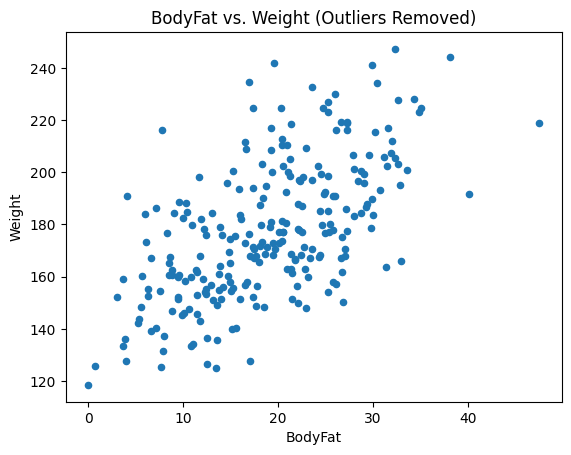

In [ ]:
import numpy as np

Q1 = bodyfat['Weight'].quantile(0.25)
Q3 = bodyfat['Weight'].quantile(0.75)

IQR = Q3 - Q1

lower_b = Q1 - 1.5 * IQR
upper_b = Q3 + 1.5 * IQR

new_bodyfat = bodyfat[(bodyfat['Weight'] >= lower_b) & (bodyfat['Weight'] <= upper_b)]

# Plot Outliers removed
new_bodyfat.plot(kind='scatter', x='BodyFat', y='Weight')
plt.title('BodyFat vs. Weight (Outliers Removed)')
plt.show()


In [ ]:
mod = sm.formula.ols('BodyFat ~ Weight', new_bodyfat).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     146.5
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           8.74e-27
Time:                        05:10:10   Log-Likelihood:                -820.35
No. Observations:                 249   AIC:                             1645.
Df Residuals:                     247   BIC:                             1652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.7398      2.816     -5.234      0.0

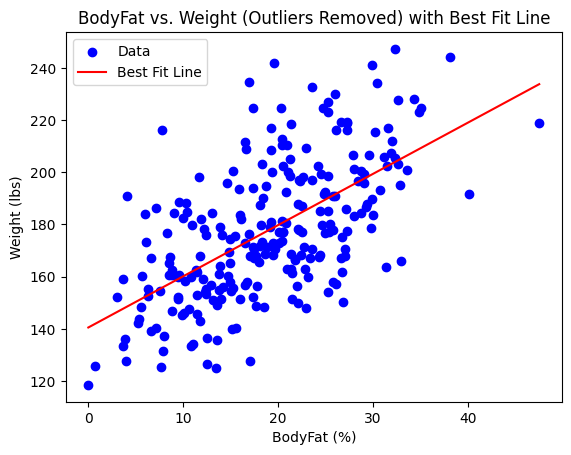

In [ ]:
X = new_bodyfat[['BodyFat']]
y = new_bodyfat['Weight']

model = LinearRegression()
model.fit(X, y)

x_vals = pd.DataFrame(np.linspace(new_bodyfat["BodyFat"].min(), new_bodyfat["BodyFat"].max(), 100), columns=["BodyFat"])
y_vals = model.predict(x_vals)

plt.scatter(new_bodyfat["BodyFat"], new_bodyfat["Weight"], label="Data", color='blue')

plt.plot(x_vals, y_vals, color="red", label="Best Fit Line")

plt.xlabel("BodyFat (%)")
plt.ylabel("Weight (lbs)")
plt.title("BodyFat vs. Weight (Outliers Removed) with Best Fit Line")
plt.legend()
plt.show()


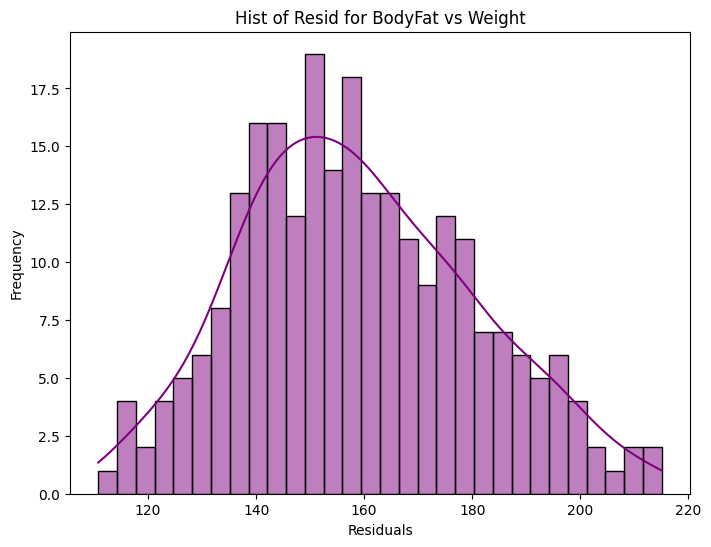

In [ ]:
y_pred = mod.predict(new_bodyfat)

residuals = new_bodyfat['Weight'] - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Hist of Resid for BodyFat vs Weight')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

person_a_weight = 150
person_b_weight = 300

person_a_df = pd.DataFrame({'Weight': [person_a_weight]})
person_b_df = pd.DataFrame({'Weight': [person_b_weight]})

prediction_a = mod.predict(person_a_df)
prediction_b = mod.predict(person_b_df)

residuals = new_bodyfat['Weight'] - mod.predict(new_bodyfat)
std_error = np.std(residuals)

se_a = std_error / np.sqrt(len(new_bodyfat))
se_b = std_error / np.sqrt(len(new_bodyfat))

conf_interval_a = stats.norm.interval(0.99, loc=prediction_a[0], scale=se_a)
conf_interval_b = stats.norm.interval(0.99, loc=prediction_b[0], scale=se_b)

print(f"Prediction for Person A (Weight: 150 lbs): BodyFat = {prediction_a[0]:.2f}%")
print(f"99% Confidence Interval for Person A: ({float(conf_interval_a[0]):.2f}, {float(conf_interval_a[1]):.2f})")

print(f"Prediction for Person B (Weight: 300 lbs): BodyFat = {prediction_b[0]:.2f}%")
print(f"99% Confidence Interval for Person B: ({float(conf_interval_b[0]):.2f}, {float(conf_interval_b[1]):.2f})")


Prediction for Person A (Weight: 150 lbs): BodyFat = 13.71%
99% Confidence Interval for Person A: (10.20, 17.21)
Prediction for Person B (Weight: 300 lbs): BodyFat = 42.16%
99% Confidence Interval for Person B: (38.65, 45.66)


f. Create a linear model of BodyFat vs. Weight and Height.

i. Show sm.formula.ols() code, output of results.summary()

ii. What is the R2 value?

iii. Is this a better model than that based only on Weight or Height? Why or why not?

iv. What is the linear equation relating BodyFat, Weight, and Height according to this model?

v. From the model, predict the BodyFat for two persons: Person A weighs 150 lbs, Person B weighs 300 lbs. Both persons have height=70”. Include the 99% confidence intervals for the predictions. In which prediction (for Person A or B), are you more confident? Why?


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

mod = sm.formula.ols('BodyFat ~ Weight + Height', new_bodyfat).fit()
print(mod.summary())

r_squared = mod_multi.rsquared
print(f"R² value: {r_squared:.4f}")


                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     145.8
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           1.77e-42
Time:                        05:16:10   Log-Likelihood:                -781.01
No. Observations:                 249   AIC:                             1568.
Df Residuals:                     246   BIC:                             1579.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.7714     10.073      7.820      0.0

NameError: name 'mod_multi' is not defined

g. Add a new transformed variable BMI = Weight/Height2 to the dataset. Create a linear model of BodyFat vs. BMI.

i. Show sm.formula.ols() code, output of results.summary()

ii. Is this a better model than the previous models? Why or why not?

iii. What is the equation relating BodyFat, Weight, and Height according to this model? Is this a linear or nonlinear equation?

iv. Plot BodyFat vs. BMI and overlay the best fit model as a straight line. (code, plot)

v. From the model, predict the BodyFat for two persons: Person A weighs 150 lbs, Person B weighs 300 lbs. Both persons have height=70”. Include the 99% confidence intervals for the predictions.

vi. Body Mass Index (BMI) is actually defined as a person’s weight in kilograms divided by the square of height in meters but your data has Weight in pounds and Height in inches. Thus, the correct BMI transformation should have been BMI = (Weight/2.20)/(Height*0.0254)2. Would using this correct BMI transformation result in a different model from what was calculated? Why or why not?

h. Add a new categorical variable (factor) AgeGroup to the dataset. AgeGroup should have three values: “Young” for Age≤40, “Middle” for Age between 40 and 60, and “Senior” for Age>60.

i. Show Pandas code that adds the AgeGroup variable. This can be done with assign and the cut() function like so: pd.cut(bodyfat.Age, bins=[-np.inf, 40, 60, np.inf], labels=["Young", "Middle", "Senior"])

ii. Create a linear model of BodyFat vs. BMI and AgeGroup.[Code, output of summary(model)]

iii. How many dummy (i.e., 0-1) variables were created in the model?

iv. Is this a better model than the previous models? Why or why not?
What are the set of equations relating BodyFat, BMI, and AgeGroup according to this model?

v.Plot BodyFat vs. BMI and overlay the model predictions (Hint: add a new column with predictions and plot the predictions using geom_line. You should see multiple lines, one for each value of the discrete variable). [Code, plot]
